In [1]:
# import pandas as pd
# import os
# import numpy as np
# data_folder = "dataset/"
# result_folder = "PointInsight/"

# raw_data_path = os.path.join(data_folder, 'carSales1.csv') 
# insight_data_path = os.path.join(result_folder, 'CarSales1PointTotal.csv') 
# raw_data_df = pd.read_csv(raw_data_path)
# insight_df = pd.read_csv(insight_data_path)

# raw_data_df.shape

In [2]:
import pandas as pd
import os
import numpy as np
data_folder = "dataset/"
result_folder = "Insight/"

raw_data_path = os.path.join(data_folder, 'carSales1.csv') 
insight_data_path = os.path.join(result_folder, 'Insight_carSales1.csv') 
raw_data_df = pd.read_csv(raw_data_path)
insight_df = pd.read_csv(insight_data_path)

In [3]:
insight_df

,Subspace,Breakdown,Sig,Impact,Type,Breakdown_value
0,*;*;*,Year,5.852967e-01,1.000000,Point,2007/1/1
1,*;*;*,Brand,7.815716e-03,1.000000,Point,Ford
2,*;*;*,Category,2.130000e-28,1.000000,Point,SUV
3,2007/1/1;*;*,Brand,3.668458e-01,0.230135,Point,Toyota
4,2007/1/1;*;*,Category,8.483136e-03,0.230135,Point,SUV
...,...,...,...,...,...,...
207,*;Volkswagen;Compact,Year,1.938843e-01,0.005040,Trend,NaN
208,*;Volkswagen;Midsize,Year,1.767146e-01,0.009090,Trend,NaN
209,*;Volkswagen;Sporty,Year,1.561911e-01,0.002144,Trend,NaN
210,*;Volkswagen;Subcompact,Year,2.045585e-01,0.004315,Trend,NaN


In [4]:
# Process the subspace features
feature_columns = ['Year', 'Brand', 'Category'] # The order is same ot the subspace
sub_space_col = list(insight_df['Subspace'])
array = []
for idx, raw in enumerate(sub_space_col):
    array.append(raw.split(';')[:])
array = np.array(array)


for idx, c in enumerate(feature_columns):
    insight_df[c] = array[:,idx]

current_columns = feature_columns + [c for c in insight_df.columns if c not in feature_columns]
insight_df = insight_df[current_columns]
insight_df['id'] = insight_df.index


insight_df['Breakdown_value'] = insight_df['Breakdown_value'].fillna(-1)
insight_df['score'] = insight_df['Sig']*insight_df['Impact']

<ipython-input-4-89a309fa6fdb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insight_df['id'] = insight_df.index
<ipython-input-4-89a309fa6fdb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insight_df['Breakdown_value'] = insight_df['Breakdown_value'].fillna(-1)
<ipython-input-4-89a309fa6fdb>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [5]:
insight_df

,Year,Brand,Category,Subspace,Breakdown,Sig,Impact,Type,Breakdown_value,id,score
0,*,*,*,*;*;*,Year,5.852967e-01,1.000000,Point,2007/1/1,0,5.852967e-01
1,*,*,*,*;*;*,Brand,7.815716e-03,1.000000,Point,Ford,1,7.815716e-03
2,*,*,*,*;*;*,Category,2.130000e-28,1.000000,Point,SUV,2,2.130000e-28
3,2007/1/1,*,*,2007/1/1;*;*,Brand,3.668458e-01,0.230135,Point,Toyota,3,8.442397e-02
4,2007/1/1,*,*,2007/1/1;*;*,Category,8.483136e-03,0.230135,Point,SUV,4,1.952265e-03
...,...,...,...,...,...,...,...,...,...,...,...
207,*,Volkswagen,Compact,*;Volkswagen;Compact,Year,1.938843e-01,0.005040,Trend,-1,207,9.771354e-04
208,*,Volkswagen,Midsize,*;Volkswagen;Midsize,Year,1.767146e-01,0.009090,Trend,-1,208,1.606248e-03
209,*,Volkswagen,Sporty,*;Volkswagen;Sporty,Year,1.561911e-01,0.002144,Trend,-1,209,3.349289e-04
210,*,Volkswagen,Subcompact,*;Volkswagen;Subcompact,Year,2.045585e-01,0.004315,Trend,-1,210,8.826287e-04


In [6]:
def get_subspace_condition(subspace_dict, feature_columns, df):
    condition = pd.Series(True, index=df.index)
    for feature in feature_columns:
        if subspace_dict[feature] == '*':
            continue
        condition = condition & (df[feature] == subspace_dict[feature])
    return condition

def get_subspace_df(subspace_dict, feature_columns, df):
    condition = get_subspace_condition(subspace_dict, feature_columns, df)
    return df[condition]

# def calc_coverage(row):
#     sub_space_df = get_subspace_df(dict(row), feature_columns, raw_data_df)
#     return len(sub_space_df.index.intersection(raw_data_df.index)) / len(sub_space_df.index.union(raw_data_df.index))

def calc_index_jaccard(df1, df2):
    return len(df1.index.intersection(df2.index)) / len(df1.index.union(df2.index))

# ---------
nodes, edges = [], []
for index, insight_row in insight_df.iterrows():
    node_info = dict(insight_row)
    node_info['sim_distance'] = [0 for i in range(0, insight_df.shape[0])]
    nodes.append(node_info)

In [7]:
for i in range(0, len(nodes)):
    src = nodes[i]
    src_subspace_df = get_subspace_df(src, feature_columns, raw_data_df)
    src['sim_distance'][i] = 1
    for j in range(i+1, len(nodes)):
        dst = nodes[j]
        dst_subspace_df = get_subspace_df(dst, feature_columns, raw_data_df)
        distance = calc_index_jaccard(src_subspace_df, dst_subspace_df)
        edges.append({'source': src['id'], 'target':dst['id'],'jaccard_index': distance})
        src['sim_distance'][j] = distance
    print(i)
print('Finish')

graph = {
    'nodes': nodes,
    'edges': edges,
    'featrues': feature_columns
}


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
Finish


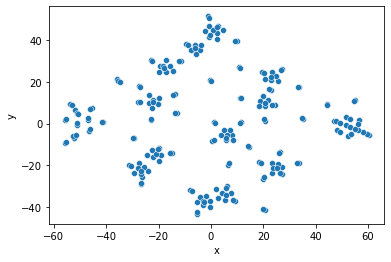

In [8]:
import numpy as np
from sklearn.manifold import TSNE
array = []
for node in nodes:
    array.append(node['sim_distance'])
array = np.array(array)

X_embedded = TSNE(n_components=2, perplexity= 5).fit_transform(array)
X_embedded.shape

import seaborn as sns
df = pd.DataFrame(X_embedded, columns = ['x', 'y'])
sns.scatterplot(data=df, x="x", y="y")

for i, node in enumerate(nodes):
    node['tsneX'] = float(X_embedded[i][0])
    node['tsneY'] = float(X_embedded[i][1])
    node['x'] = float(X_embedded[i][0])
    node['y'] = float(X_embedded[i][1])



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


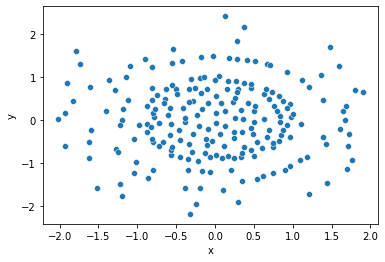

In [9]:

from sklearn.datasets import load_digits
from sklearn.manifold import MDS

array = []
for node in nodes:
    array.append(node['sim_distance'])
array = np.array(array)
embedding = MDS(n_components=2, metric = True)
X_embedded = embedding.fit_transform(array)

df = pd.DataFrame(X_embedded, columns = ['x', 'y'])
sns.scatterplot(data=df, x="x", y="y")

for i, node in enumerate(nodes):
    node['mdsX'] = float(X_embedded[i][0])
    node['mdsY'] = float(X_embedded[i][1])

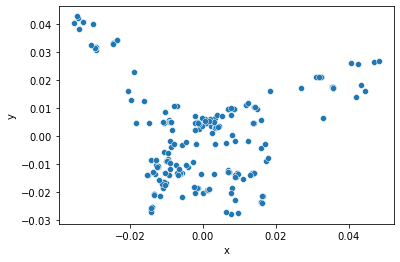

In [10]:
from sklearn.datasets import load_digits
from sklearn.manifold import SpectralEmbedding

array = []
for node in nodes:
    array.append(node['sim_distance'])
array = np.array(array)
embedding = SpectralEmbedding(n_components=2)
X_embedded = embedding.fit_transform(array)

df = pd.DataFrame(X_embedded, columns = ['x', 'y'])
sns.scatterplot(data=df, x="x", y="y")

for i, node in enumerate(nodes):
    node['seX'] = float(X_embedded[i][0])
    node['seY'] = float(X_embedded[i][1])


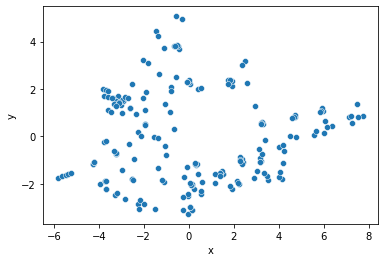

In [11]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap

array = []
for node in nodes:
    array.append(node['sim_distance'])
array = np.array(array)
embedding = Isomap(n_components=2)
X_embedded = embedding.fit_transform(array)

df = pd.DataFrame(X_embedded, columns = ['x', 'y'])
sns.scatterplot(data=df, x="x", y="y")

for i, node in enumerate(nodes):
    node['isoX'] = float(X_embedded[i][0])
    node['isoY'] = float(X_embedded[i][1])


In [12]:
import json
with open('insight_graph2.json', 'w') as output_file:
    json.dump(graph, output_file)


In [13]:
nodes[0]

{'Year': '*',
 'Brand': '*',
 'Category': '*',
 'Subspace': '*;*;*',
 'Breakdown': 'Year',
 'Sig': 0.585296747,
 'Impact': 1.0,
 'Type': 'Point',
 'Breakdown_value': '2007/1/1',
 'id': 0,
 'score': 0.585296747,
 'sim_distance': [1,
  1.0,
  1.0,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.16363636363636364,
  0.16363636363636364,
  0.2,
  0.2,
  0.10909090909090909,
  0.10909090909090909,
  0.09090909090909091,
  0.09090909090909091,
  0.09090909090909091,
  0.09090909090909091,
  0.09090909090909091,
  0.09090909090909091,
  0.12727272727272726,
  0.12727272727272726,
  0.12727272727272726,
  0.12727272727272726,
  0.09454545454545454,
  0.09454545454545454,
  0.05454545454545454,
  0.05454545454545454,
  0.14181818181818182,
  0.14181818181818182,
  0.07272727272727272,
  0.07272727272727272,
  0.16363636363636364,
  0.16363636363636364,
  0.4,
  0.4,
  0.05454545454545454,
  0.05454545454545454,
  0.01818181818181818,
  0.01818181818181818,
  0.03272727